# Welcome to lab_regression! 🏠

One of the coolest parts of data science is **prediction** with **machine learning**. Up until now, we have done a myriad of data analysis given existing data. We have even generated our own data in simulations! Today, using some foundational concepts of machine learning, we will be making predictions based on data!

As you learned in lecture, **linear regression** is a powerful tool that can be used to quantify trends in data. We can use our Python skills to perform **simple linear regression** in this lab! 


A few tips to remember:

- **You are not alone on your journey in learning programming!** You have your lab TA, your CAs, your lab group, and the professors (Prof. Wade and Prof. Karle), who are all here to help you out!
- If you find yourself stuck for more than a few minutes, ask a neighbor or course staff for help! When you are giving help to your neighbor, explain the **idea and approach** to the problem without sharing the answer itself so they can have the same ***ah-hah*** moment!
- We are here to help you! Don't feel embarrassed or shy to ask us for help!

Let's get started!

In [ ]:
# Meet your CAs and TA if you haven't already!
# ...first name is enough, we'll know who they are! :)
ta_name = "Alex"
ca1_name = "Ana"
ca2_name = "Areeba"


# Say hello to each other!
# - Groups of 3 are ideal :)
# - However, groups of 2 or 4 are fine too!
#
# Question of the Day (QOTD) to Ask Your Group: "If you have to describe your Thanksgiving plans in one word, what would it be?"
partner1_name = ""
partner1_netid = ""
partner1_wprd = ""

partner2_name = ""
partner2_netid = ""
partner2_word = ""

partner3_name = ""
partner3_netid = ""
partner3_word = ""

<hr style="color: #DD3403;">

# Part 1: Housing Data EDA

Today, we'll be working with a **housing prices** dataset. This data has the price of many houses/properties alongside various descriptive qualities of those properties (the total square feet, number of bathrooms, number of bedrooms, etc.).

We will use basic **machine learning** techniques in this lab to **predict house prices** with a **linear regression** model.

But before we approach this implementation of **simple linear regression**, let's **familiarize ourselves with the data** by doing some **EDA (Exploratory Data Analysis)**. This will include:
- Viewing a correlation matrix of our data
- Plotting visualizations to visually see relationships in the data

## Puzzle 1.1: Loading In
We've provided you with a `housing.csv` file containing the Housing Dataset. You know the drill. Let's **import the Housing Dataset** in the cell below. Make sure you name your DataFrame `df`. 

In [1]:
import pandas as pd
df = pd.read_csv("housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


### 🔬 Test Case Checkpoint 🔬

In [2]:
## == TEST CASES for Puzzle 1.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert ( 'df' in vars() ), "Your DataFrame should be named df."
assert( len(df) == 545 ), "This is not the Housing Dataset we are looking for..."
assert( 'price' in df.columns.to_list() ), "This is not the Housing Dataset we are looking for..." 

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 1.2: Narrowing Down our Dataset
You may have noticed that our `df` contains both **quantitative** (numerical) and **qualitative** (text-based) data. For this lab, we only want to consider **quantitative (numerical)** columns to predict **price**. 

Let's narrow down our dataset to only include the **quantitative** (numerical) data.

First, using the code cell below, define a **list** of **strings** `numerical_cols` that contains all the columns in our `df` that are **numerical**. 


**Hint: there are 6 columns that should go in this list!** 

In [3]:
numerical_cols = ["price", "area", "bedrooms", "bathrooms", "stories", "parking"]
numerical_cols

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

Next, we're going to **redefine** our DataFrame `df` to **only include** these **numerical columns**. Pandas gives us a lot of flexibility, such that with the following syntax:
> `new_df = df[list]`

You can take **multiple columns** of a DataFrame `df` at once and transfer them to another DataFrame, `new_df`.

Using this syntax, copy all the `numerical_cols` from our `df`, storing results in a new DataFrame `df_numerical`:

In [4]:
df_numerical = df[numerical_cols]
df_numerical

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


### 🔬 Test Case Checkpoint 🔬

In [5]:
## == TEST CASES for Puzzle 1.2  ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors,/ check you previous cell, make changes, and RE-RUN your code and then this cell.
import numpy as np 
assert( ('numerical_cols' in vars()) and (type(numerical_cols) == list)), "You should be creating a list of numerical columns named `numerical_cols`."
assert( len(numerical_cols) == 6 ), "There are exactly 6 numerical columns in this dataset."
assert( all(df[col].dtype in (np.float64, np.int64) for col in numerical_cols) ), "There is a non-numerical column in `numerical_cols`."

assert( 'df_numerical' in vars() ), "The new DataFrame should be named`df_numerical`."
assert( len(df) == len(df_numerical) ), "df_numerical should be the same length as our original df."
assert (len(df_numerical.columns.to_list()) == 6 ), "df_numerical should have 6 columns."
assert( all(df_numerical[col].dtype in (np.float64, np.int64) for col in df_numerical.columns) ), "There is a non-numerical column in df_numerical."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 1.3: Correlation Matrix
In lecture, you learned about the correlation coefficient $r$ which measures the **strength of linear association** between two variables ($X$ and $y$).

Pandas provides a useful function `.corr()` that generates a table of the correlation coefficients between all columns in a DataFrame. Some versions of Pandas will not run `.corr()` on DataFrames with non-numerical data, though, so be sure to use `df_numerical` for this function.

Now, find the correlation coefficient matrix for `df_numerical`:

In [6]:
df_numerical.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


### ML Vocabulary: Features and Labels

Quick vocabulary lesson! In machine learning, we often organize **instances** in our dataset into **features** and **labels** (in this lab, an **instance** is one row of our DataFrame). 

**Features** are characteristics that describe each **instance** in our dataset. These **features** are the **inputs** fed into machine learning models that will make **predictions**. They are our **independent variables**, or $X$. 

**Labels** are the output or **target** variables we are **trying to predict**. They are our **dependent variables**, or $y$. 

In the context of our housing dataset, the single **label** we are trying to predict is the **price** of a housing property. 

### Analysis: Potential Features

**Q1: Given that our label (what we want to predict) is price, what are some *meaningful features* we could use to make a prediction? Use numbers from the correlation matrix to support your answer.**

Some meaningful features include area (r = 0.53), bathrooms (r = 0.51), and stories (r = 0.42).

## Puzzle 1.4: Visualizations
For the purposes of this lab, we are ultimately interested in how we can best predict **price** ($y$) with a **single feature** ($X$) from our DataFrame, `df`. 

But first, let's observe the relationships between various other columns in `df`. 

### Scatter Plot #1: Bedrooms and Bathrooms
Generate a scatter plot from `df` where the dependent variable ($y$) is `bedrooms` and independent variable ($X$) is `bathrooms`.

<Axes: xlabel='bathrooms', ylabel='price'>

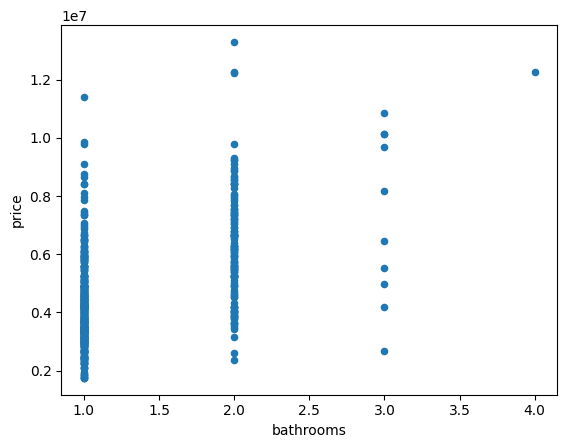

In [7]:
df.plot.scatter(x="bathrooms", y="price")

**Group Discussion 1**: Do you see any *trends* in the scatter plot between **bedrooms** and **bathrooms**? If your group were to describe the *correlation*, how would you all describe it? 
Is the relationship positive or negative? Does it seem linear or non-linear? Is there a strong or weak *relationship* between the variables?

The scatterplot appears to be a weak positive linear relationship.

**Q2: Looking back to the correlation coefficient in Puzzle 1.3, what was the correlation coefficient for this pair of data points? Does it align with your discussion above? Does it make sense logically?**

r=0.366
This aligns with observations from the scatterplot. It indicates a weak positive relationship.

### Scatter Plot #2: Stories and Parking
Generate a scatter plot from `df` where the dependent variable ($y$) is `stories` and independent variable ($X$) is `parking`.

<Axes: xlabel='parking', ylabel='price'>

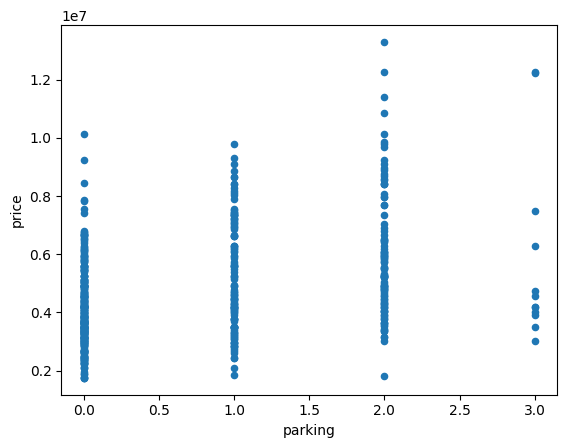

In [8]:
df.plot.scatter(x="parking", y="price")

**Group Discussion 2**: Do you see any *trends* in the scatter plot between **parking** and **stories**? If your group were to describe the *correlation*, how would you all describe it? 
Is the relationship positive or negative? Does it seem linear or non-linear? Is there a strong or weak *relationship* between the variables?

This scatterplot appears to have a weak positive linear relationship.

**Q3: Looking back to the correlation coefficient in Puzzle 1.3, what was the correlation coefficient for this pair of data points? Does it align with your discussion above? Does it make sense logically?**

r=0.384
This aligns with observations from the scatterplot. It indicates a weak positive relationship.

### Scatter Plot #3: Area and Price
Now, let's circle back to our original goal of predicting **price**. 

Generate a scatter plot from `df` where the dependent variable ($y$) is `price` and independent variable ($X$) is `area`.



<Axes: xlabel='area', ylabel='price'>

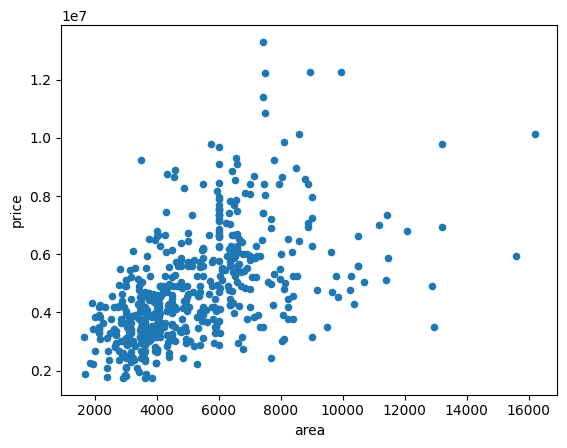

In [9]:
df.plot.scatter(x="area", y="price")

**Group Discussion 3**: Do you see any *trends* in the scatter plot between **area** and **price**? If your group were to describe the *correlation*, how would you all describe it? 
Is the relationship positive or negative? Does it seem linear or non-linear? Is there a strong or weak *relationship* between the variables?

The relationship appears to be strong and positive and might be non-linear--it almost looks like a square root curve would fit.

**Q4: Looking back to the correlation coefficient in Puzzle 1.3, what was the correlation coefficient for this pair of data points? Does it align with your discussion above? Does it make sense logically?**

r=0.535
This aligns with obersvations from the scatterplot. It indicates a strong positive relationship.

<hr style="color: #DD3403;">

# Part 2: Simple Linear Regression

From Scatter Plot #3 above, you may have noticed that **area** and **price** have significant **linear correlation**. 

In lecture, we learned that **linear regression** allows us to predict values based on a "line of best fit". The equation for simple linear regression is:

> $$y = (\text{slope}) * X + \text{intercept}$$

For this portion of the lab, we will be using **linear regression** to explore the relationship between **area** (in square feet) and **price** (in dollars) of housing properties in our `df`. 

We can apply formulas we have learned in lecture alongside Python to create a **linear regression model** to predict **housing price** ($y$) given **area** ($X$).

## Puzzle 2.1: Calculating Slope of the Regression Line
In lecture, you learned how to **calculate the slope** of the regression line given your $X$ and $y$ columns of data. The formula is as follows:

> $$\text{slope} = r * \frac{SD(y)}{SD(x)}$$

Where $r$ is the correlation coefficient between $X$ and $y$, and $SD$ stands for standard deviation. 

With this, find the slope of the regression line where the dependent variable ($y$) is `price` and the independent variable ($X$) is `area`, storing your answer in the **numeric variable** `slope` below:

**Tip: Be sure to use `df_numerical` when getting $r$ from the correlation matrix. This is because some versions of Pandas will not run a correlation matrix on a DataFrame that contains non-numerical data.**

In [17]:
slope = df_numerical.corr()["price"]["area"] * (df_numerical.price.std() / df_numerical.area.std())
slope

461.9748942727831

**Q5: How do you interpret your slope?  What does it mean in terms of the actual units in this problem: `area` (square feet) and `price` (dollars)?**

For an increase by 1 square foot, the price increases by $461.97.

## Puzzle 2.2: Calculating Intercept of the Regression Line
You also learned how to calculate the **y-intercept** of the regression line in lecture. The formula is as follows:

> $$\text{intercept} = \text{avg}(y) - \text{slope} * \text{avg}(X)$$

Find the **y-intercept** of the regression line between `price` ($y$) and `area` ($X$), storing your result in the numeric variable `intercept` below: 

In [18]:
intercept = df_numerical.price.mean() - (slope * df_numerical.area.mean())
intercept

2387308.4823964317

**Q6: How do you interpret your intercept?  What does it mean in terms of the actual units in this problem: `area` (square feet) and `area` (dollars)?  Does it even make sense in the context of this problem?**

For a house with 0 square feet, it costs $2,387,308

### 🔬 Test Case Checkpoint 🔬

In [19]:
## == TEST CASES for Puzzle 2.1, 2.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors,/ check you previous cell, make changes, and RE-RUN your code and then this cell.
from math import isclose
assert( isclose(slope, 461.9748942727831) ), "The slope doesn't seem correct."
assert( isclose(intercept, 2387308.4823964317) ), "The intercept doesn't seem correct."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Visualizing Your Work: Seaborn 
Now that you have calculated the **slope** and **y-intercept** of your regression line, let's **visualize** it. Run the following code that uses the `seaborn` library to **plot a regression line** on top of a scatter plot of between `area` and `price` - your regression line will be **red**. 

<Axes: xlabel='area', ylabel='price'>

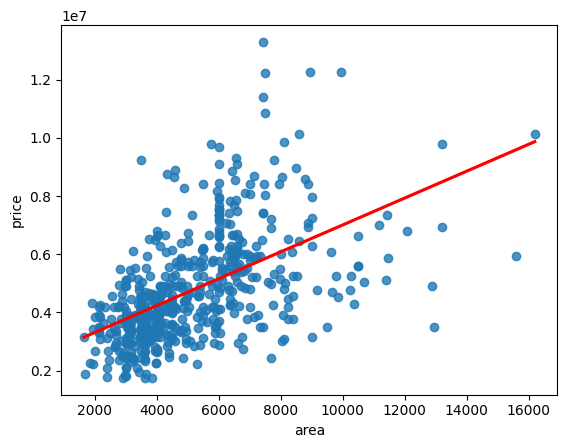

In [20]:
# Run the following code to see the regression line you made!!! :)
import seaborn as sns

# Create scatter plot with regression line:
sns.regplot(data=df, x="area", y="price", ci=None, line_kws={'color':'red'})

If you **do not** have the `seaborn` library installed, try running any one of following commands in your **terminal** until successful installation:
- `pip install seaborn`
- `pip3 install seaborn`
- `py -m pip install seaborn`
- `python3 -m pip install seaborn`

If you are still having import errors trying these commands, **let your lab CAs and TAs know**! They will help you through the installation process. 

### Analysis: Regression Plot
**Q7: Based on the regression line plotted above, would you say it is a good model of predicting the housing price? For what range of `area` would you be confident predicting price given this model?**

I would say that it is a good model of predicting house price. I would be confident predicting the price between areas of 2,000-16,000 square feet.

<hr style="color: #DD3403;">

# Part 3: Predictions and Residuals

## Puzzle 3.1: Predicting Price

In Part 2, you found the intercept and slope for a line of best fit. Using your regression line, make a new column in our DataFrame `df` named `price_prediction`, which will store the **predicted price** for each house given its `area`. Use the values you calculated above in an equation of the regression line to populate this column. Remember,

> $$y = (\text{slope}) * X + \text{intercept}$$

In [23]:
df['price_prediction'] = slope * df.area + intercept
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_prediction
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,5.815162e+06
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,6.526604e+06
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,6.988578e+06
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,5.852120e+06
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,5.815162e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,3.773233e+06
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,3.496048e+06
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,4.059658e+06
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,3.731655e+06


### 🔬 Test Case Checkpoint 🔬

In [24]:
## == TEST CASES for Puzzle 3.1  ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors,/ check you previous cell, make changes, and RE-RUN your code and then this cell.
from math import isclose
assert( 'price_prediction' in df.columns.to_list() ), "Your DataFrame df does not contain a new column `price_prediction`."
assert( isclose(df.price_prediction.mean(), 4766729.247706421) ), "You have not calculated the predictions of price correctly. Double-check your formula."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 3.2: Calculating Residuals
Residuals are the **differences between** the **observed (actual) value** of $y$ (`price`) and the **predicted value** of $y$ (`price_prediction`, or just $\hat{y}$).

Let's **find the residuals** and **evaluate** the simple regression model! 

In the following cell, write the Python code to store the **residual** for the `price` column as `residual`.

In [25]:
df['residual'] = df.price - df.price_prediction
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_prediction,residual
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,5.815162e+06,7.484838e+06
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,6.526604e+06,5.723396e+06
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,6.988578e+06,5.261422e+06
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,5.852120e+06,6.362880e+06
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,5.815162e+06,5.594838e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,3.773233e+06,-1.953233e+06
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,3.496048e+06,-1.728898e+06
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,4.059658e+06,-2.309658e+06
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,3.731655e+06,-1.981655e+06


### 🔬 Test Case Checkpoint 🔬

In [26]:
## == TEST CASES for Puzzle 3.2  ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors,/ check you previous cell, make changes, and RE-RUN your code and then this cell.
import math
assert(abs(df['residual'].sum()) < 0.0001), "The residuals might not be correct. Please check again!"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


<hr style="color: #DD3403;">

# Part 4: Multi-Linear Regression with Python
Up until this point of the lab, you have calculated a **simple linear regression model** using your knowledge from **lecture** and **algebra**, but let's take it **one step further**. We will use Python's `sklearn` library to create a **multi-linear regression model** that accounts for **multiple features** of our housing data. 

Because this material has not been covered in lecture, we provide **heavy guidance** on the code for this part of the lab. 

## Puzzle 4.1: Train-Test Split, Labels, and Features

Earlier, we noticed that our original `df` contains both **quantitative** (numerical) and **qualitative** (text-based) data. We only want to consider **quantitative (numerical)** columns as potential **features** to predict **price**. 

Review these potential **features** again by running `df_numerical` in the cell below.


In [27]:
df_numerical

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In Parts 1-3, we used the entire Housing Dataset to **calculate** our model's **regression line**.

In machine learning, we almost never use the **entire dataset** to train. This is because we want to evaluate the **effectiveness** of our model on **unseen data**. If we simply trained a model on the **entire dataset**, it may **over fit** to the data in that dataset. 

For this reason, we are going to **split** our `df_numerical` into two new DataFrames:
1. `test_df`, containing **20% of the rows** in `df_numerical`
2. `train_df`, containing the **remaining rows** of `df_numerical` not in `test_df`. 

In the cell below, populate `test_df` with a random sample of 20% of the rows from `df_numerical`:

In [28]:
test_df = df.sample(frac=0.2)
test_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_prediction,residual
415,3395000,4785,3,1,2,yes,yes,yes,no,yes,1,no,furnished,4.597858e+06,-1.202858e+06
188,5075000,5720,2,1,2,yes,no,no,no,yes,0,yes,unfurnished,5.029805e+06,4.519512e+04
259,4473000,6360,2,1,1,yes,no,yes,no,yes,1,no,furnished,5.325469e+06,-8.524688e+05
329,3990000,3960,3,1,2,yes,no,no,no,no,0,no,furnished,4.216729e+06,-2.267291e+05
179,5215000,3180,3,2,2,yes,no,no,no,no,2,no,semi-furnished,3.856389e+06,1.358611e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,3570000,4500,2,1,1,no,no,no,no,no,0,no,furnished,4.466196e+06,-8.961955e+05
166,5320000,7800,3,1,1,yes,no,yes,no,yes,2,yes,unfurnished,5.990713e+06,-6.707127e+05
170,5250000,5500,3,2,1,yes,no,yes,no,no,0,no,semi-furnished,4.928170e+06,3.218296e+05
500,2660000,2800,3,1,1,yes,no,no,no,no,0,no,unfurnished,3.680838e+06,-1.020838e+06


We have provided you with the code to generate `train_df` given a correct `test_df`. 

The code below selects all the rows from `df_numerical` whose indices **are not** (~) in `test_df`. 

**Do not change the cell** below, just **run it**:

In [29]:
train_df = df_numerical[~df_numerical.index.isin(test_df.index)]
train_df

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
4,11410000,7420,4,1,2,2
5,10850000,7500,3,3,1,2
...,...,...,...,...,...,...
539,1855000,2990,2,1,1,1
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0


Now that we have defined our **train-test split**, we can begin to specify the **features** and **label** for our regression model. Refer back to the explanation of this vocabulary from Puzzle 1.3 if necessary. 

In the context of our dataset, our **dependent variable** or **label** is the `price` of houses. 

Our independent **variables** or **features**  are **all the remaining columns**. 

Knowing this, define these two variables in the cell below:
- `independent_variables`, a list of the names of ALL of our the independent variables
- `dependent_variable`, the name of our dependent variable (as a string, not a list)

In [36]:
independent_variables = ["area", "bedrooms", "bathrooms", "stories", "parking"]
independent_variables

['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [37]:
dependent_variable = "price"
dependent_variable

'price'

### 🔬 Test Case Checkpoint 🔬

In [38]:
## == TEST CASES for Puzzle 4.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert( 'train_df' in vars() and 'test_df' in vars() ), "The DataFrames for the train-test split should be named `train_df` and `test_df`."
assert( len(test_df) == len(df_numerical) * 0.2 ), "The `test_df` should be sampling 20 percent of `df_numerical`."
assert( len(test_df) + len(train_df) == len(df_numerical) ), "The combined sizes of `train_df` and `test_df` should be equal to `df_numerical`."
assert( pd.merge(test_df, train_df, how='inner').empty ), "There should not be any overlapping rows in `train_df` and `test_df`."

assert( dependent_variable not in independent_variables ), "Your dependent variable must NOT be an independent variable."
assert( dependent_variable in df_numerical ), f"{dependent_variable} (`dependent_variable`) must be a column in df_numerical"

assert( len(independent_variables) == 5 ), "There should be five independent variables."
for var in independent_variables:
  assert( var in df_numerical ), f"{var} (in `independent_variables`) must be a column in df_numerical"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Part 4.2: Running and Evaluating a Model
Now that we've setup our **training** and **testing** data with the correct **features** and **label**, we can use `sklearn` to train a multiple linear regression model. 

In the cell below, we have imported the proper module from `sklearn`, **trained** a model, and generated **predictions** on your testing data. 

**Run the cell** below and **read the comments** for explanation!

In [41]:
# Importing the LinearRegression model from sklearn:
from sklearn.linear_model import LinearRegression

# Creating our model and storing in the variable `model`:
model = LinearRegression()

# Fitting the model to our **training** data. For almost all models in sklearn,
# the features (X) and labels (y) are passed as model.fit(X, y).
model.fit(train_df[independent_variables], train_df[dependent_variable])

# Generating predictions by passing our **testing** set features to model.predict()
predictions = model.predict( test_df[independent_variables] )

After running the cell above, we now have a set of `predictions` on the testing data! 

### Reflection: More Machine Learning
**Q8: You've seen a *super small* part of the world of machine learning in this lab. There are hundreds of other machine learning methods that we won't get to cover in DISCOVERY, but you can explore on your own! Thinking back to the original housing dataset and what data and/or techniques we used in this lab, what is one thing that you think could have improved our model?**

Using non-linear lines of best fit may produce more accurate predictions.

<hr style="color: #DD3403;">

# Submission

You're almost done!  All you need to do is to commit your lab to GitHub:

1.  ⚠️ **Make certain to save your work.** ⚠️ To do this, go to **File => Save All**

2.  After you have saved, exit this notebook and follow the Canvas instructions to commit this lab to your Git repository!

3. Your TA will grade your submission and provide you feedback after the lab is due. :)